In [6]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

In [7]:


mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

17227776/17225924 [==============================] - 73s 4us/step


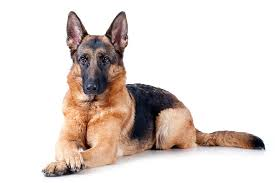

In [9]:
Image(filename='resim.jpg')

In [10]:
preprocessed_image = prepare_image('resim.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 2us/step


[[('n02106662', 'German_shepherd', 0.99851197),
  ('n02105162', 'malinois', 0.0013296818),
  ('n03803284', 'muzzle', 4.333408e-05),
  ('n02109047', 'Great_Dane', 1.9681e-05),
  ('n02091467', 'Norwegian_elkhound', 1.4796189e-05)]]

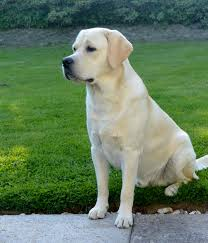

In [11]:
Image(filename='resim2.jpg')

In [12]:
preprocessed_image = prepare_image('resim2.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02099712', 'Labrador_retriever', 0.9716493),
  ('n02104029', 'kuvasz', 0.009740893),
  ('n02111500', 'Great_Pyrenees', 0.0070603215),
  ('n02099601', 'golden_retriever', 0.005773463),
  ('n02109525', 'Saint_Bernard', 0.0016559258)]]

In [15]:
import cv2
import numpy as np

In [26]:
path="C://Users//abdul//.conda//envs//tensorflow//Lib//site-packages//cv2\data//"
face_cascade=cv2.CascadeClassifier(path+"haarcascade_frontalface_default.xml")

In [27]:
eye_cascade=cv2.CascadeClassifier(path +"haarcascade_eye.xml")

In [34]:
cap=cv2.VideoCapture(0)
while True:
    _,img=cap.read()
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),4)
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        
        eyes=eye_cascade.detectMultiScale(roi_gray)
        i=0
        for(ex,ey,ew,eh) in eyes:
            i+=1
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
            if(1==2):
                break
    cv2.imshow("baslik",img)
    k=cv2.waitKey(30) & 0xff
    
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()